# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\Data Science\Statistics\Statistics Project\Maximizing Revenue for Drivers\Dataset\yellow_tripdata_2020-01.csv")

In [3]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


Checking Shape of data

In [4]:
data.shape

(6405008, 18)

Checking Data Types

In [5]:
# datatypes of the data
data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

Changing Data Types

In [6]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

Cheching duration of ride

In [7]:
data['duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['duration'] = data['duration'].dt.total_seconds()/60

In [8]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


Fliter Data

In [9]:
# filtered data with relevant columns essntial fot the analysis
df = data[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


Cheching null values

In [10]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [11]:
print('Percentage of null values in data:',(65441/len(df)*100),'%')

Percentage of null values in data: 1.021716132126611 %


In [12]:
# as the data has only 1% of data missing, we can simply drop the records with missing values. 
df.dropna(inplace=True)

In [13]:
df.shape

(6339567, 5)

Chaning Data Types

In [14]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

Checking Duplicated Values

In [15]:
# check for the duplicate rows
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [16]:
# removing duplicate rows as they will not contribute in analysis
df.drop_duplicates(inplace=True)

In [17]:
# after removing missing values and duplicate rows, now we have this much records left
df.shape

(3007861, 5)

Checking Distribution

In [18]:
# passenger count distribution
(df['passenger_count'].value_counts(normalize=True))*100

passenger_count
1    58.198102
2    19.035022
3     6.636011
5     6.293675
6     3.927176
4     3.604621
0     2.303298
7     0.000931
9     0.000598
8     0.000565
Name: proportion, dtype: float64

In [19]:
# payment type distribution
(df['payment_type'].value_counts(normalize=True))*100

payment_type
1    67.826705
2    30.757306
3     0.872148
4     0.543808
5     0.000033
Name: proportion, dtype: float64

In [20]:
# filtering for type 1 and 2
df = df[df['payment_type'] < 3]

# filtering for passsenger count from 1 to 2
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [21]:
df.shape

(2780283, 5)

In [22]:
# replacing the payment type encoded value 1 and 2 to Card and Cash
df['payment_type'].replace([1,2],['Card', 'Cash'],inplace=True)

# Exploratory Data Analysis

In [23]:
# descriptive statistics for data
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [24]:
# filtering the records for only positive values
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

In [25]:
df.shape

(2748932, 5)

Handling Outliners

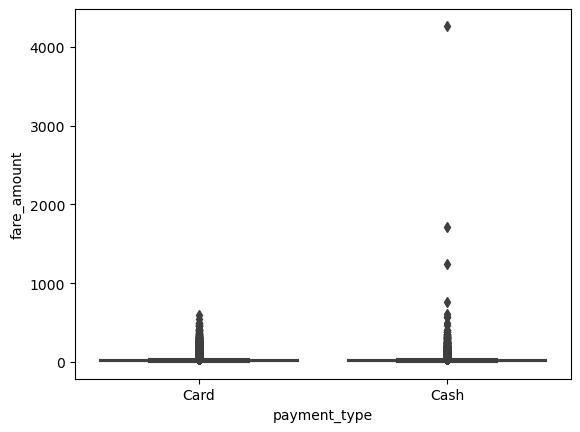

In [26]:
# checking for outliers
sns.boxplot(x='payment_type', y='fare_amount', data=df)
plt.show()

In [27]:
# removing outliers using interqurtile range for the numerical variables
for col in ['fare_amount', 'trip_distance', 'duration']:
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1
    
    # define lower and upper limit for outliers
    Lower_limit = Q1-1.5*IQR
    Upper_limit = Q3+1.5*IQR

    # filter out outliers
    df = df[(df[col]>=Lower_limit) & (df[col]<=Upper_limit)]
    
    

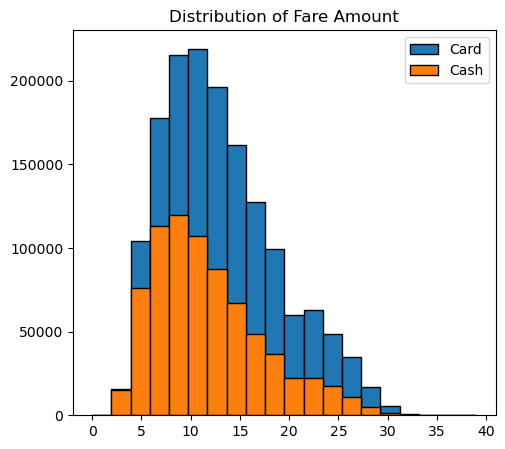

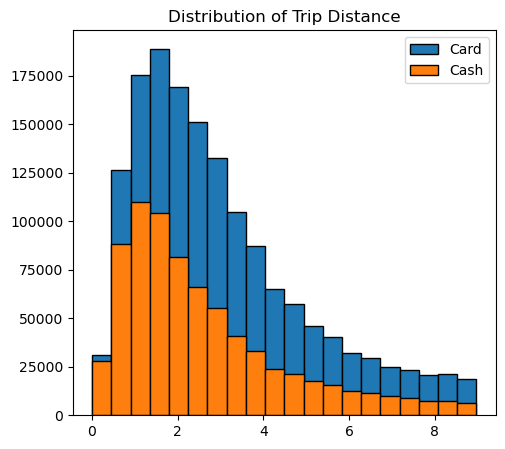

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color = '#1F77B4', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color = '#FF7F0E', label = 'Cash')
plt.title('Distribution of Fare Amount')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color = '#1F77B4', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color = '#FF7F0E', label = 'Cash')
plt.title('Distribution of Trip Distance')
plt.legend()
plt.show()

In [29]:
# calulating the mean and standard deviation group by on payment type
df.groupby('payment_type').agg({
    'fare_amount' : ['mean', 'std'],
    'trip_distance' : ['mean', 'std']
})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

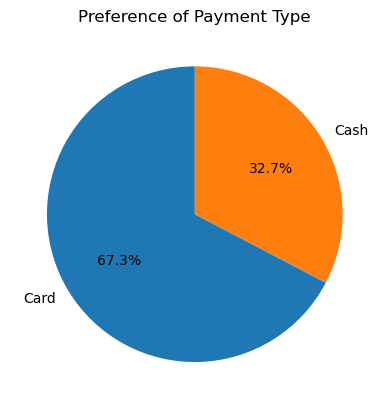

In [30]:
plt.pie(df['payment_type'].value_counts(normalize=True), labels = df['payment_type'].value_counts().index,
       startangle=90, autopct= '%1.1f%%', colors = ['#1F77B4', '#FF7F0E'])
plt.title('Preference of Payment Type')
plt.show()

In [31]:
# calculating the total passenger count distribution based in the different payment type
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()

# renaming the passenger count to count to reset the index
passenger_count.rename(columns={'passenger_count' : 'count'}, inplace = True)
passenger_count.reset_index(inplace=True)

In [32]:
# calculating the percentage of the each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [33]:
# creating a new empty dataframe to store the distribution of each payment type (useful to the visualizatio)
df2 = pd.DataFrame(columns =['payment_type',1,2,3,4,5])
df2['payment_type'] = ['Card', 'Cash']
df2.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df2.iloc[1,1:] = passenger_count.iloc[5:,-1]
df2

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


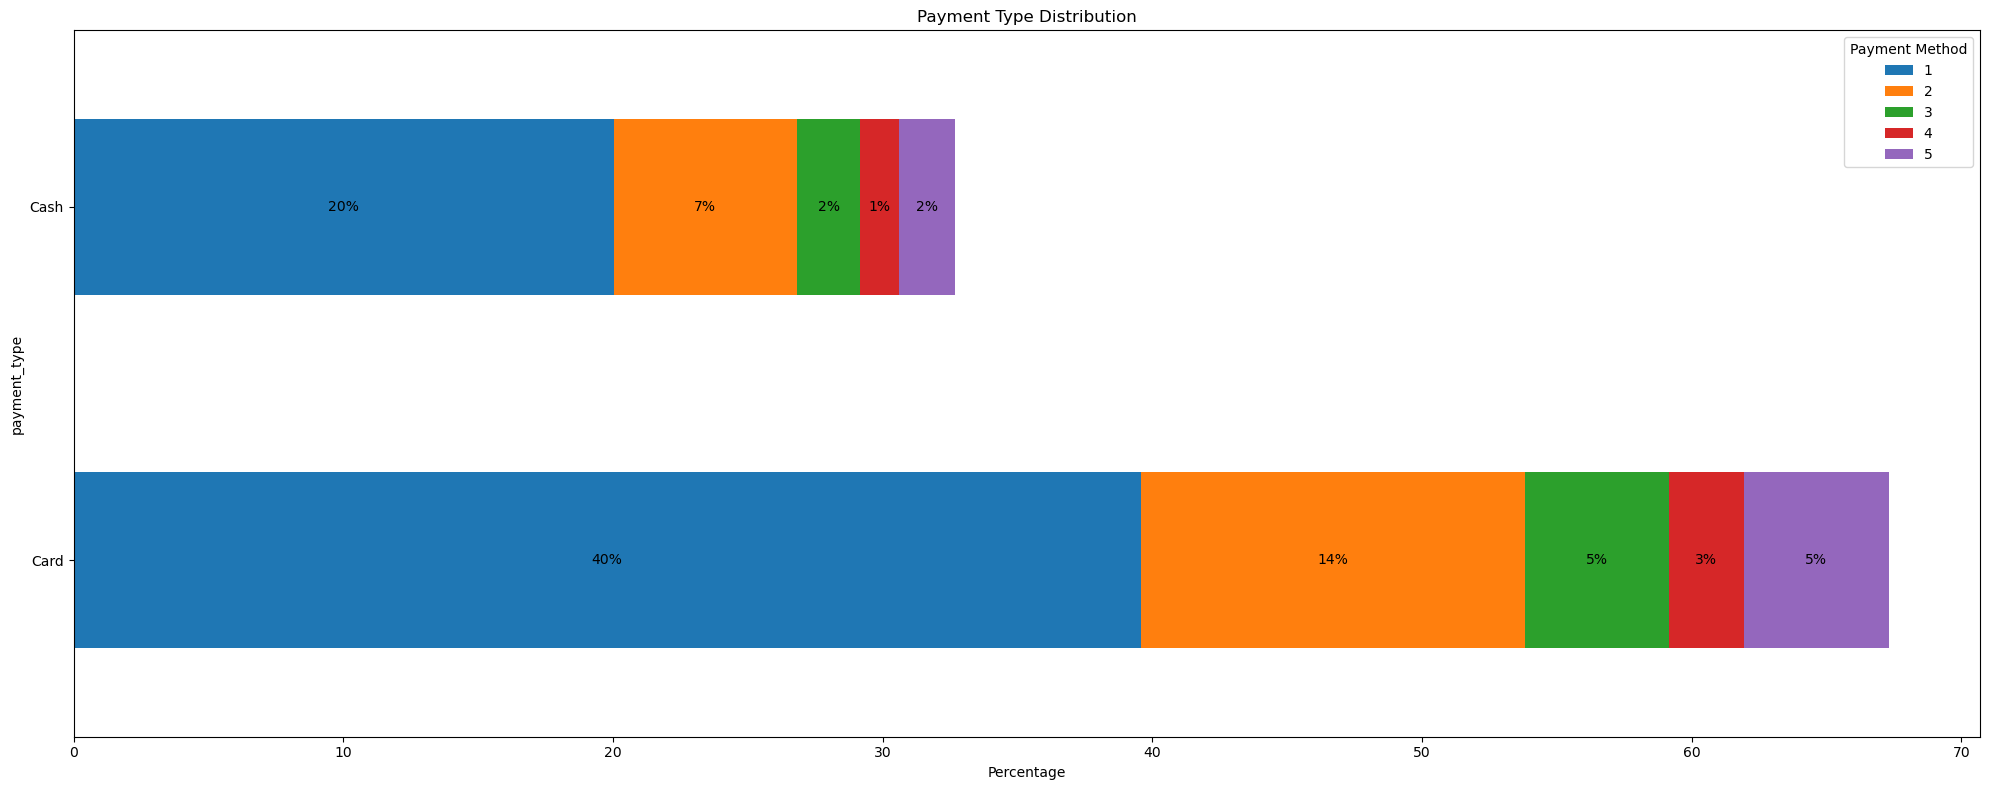

In [34]:
fig, ax = plt.subplots(figsize=(20,8))
df2.plot(x='payment_type', kind='barh', stacked = True,ax=ax, color=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'])

# Add percentage text

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')


# Customize plot
ax.set_xlabel('Percentage')
ax.set_title('Payment Type Distribution')
ax.legend(title='Payment Method', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Testing Hypothesis

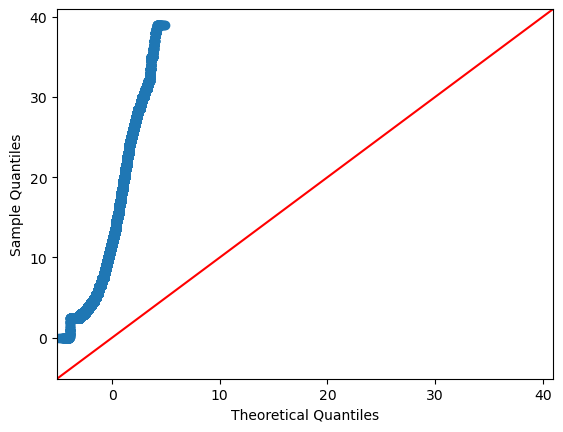

In [35]:
import statsmodels.api as sm

sm.qqplot(df['fare_amount'], line = '45')
plt.show()

Step 1:<br>
Null Hypothesis (H<sub>0</sub>) : There is no difference customers who use credit cards and customers who use cash <br>
vs<br>
Alternative Hypothesis (H<sub>1</sub>) : There is difference between customers who use credit cards and customers who use cash <br>
<br>
Step 2: Two Tailed<br>
<br>
Step 3: Alpha = 0.05
<br>

In [36]:
card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']

In [37]:
# Step 4 : Test Statistics

from statsmodels.stats.weightstats import ztest

z_score,p_value = ztest(card_sample,cash_sample)


print("Step 4: Test Statistics")
print("T Statistics", z_score)
print("P-value", p_value)
print(" ")

# Step 5: Conclusion

alpha = 0.05

if p_value < alpha:
    print('Step 5: Conclusion')
    print('We reject H0')
    print('There is difference between customers who use credit cards and customers who use cash')

    
else:
    print('Step 5: Conclusion')
    print('We do not reject H0')
    print('There is no difference between customers who use credit cards and customers who use cash')

Step 4: Test Statistics
T Statistics 166.81250013045764
P-value 0.0
 
Step 5: Conclusion
We reject H0
There is difference between customers who use credit cards and customers who use cash
